<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/All_visualizations_on_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

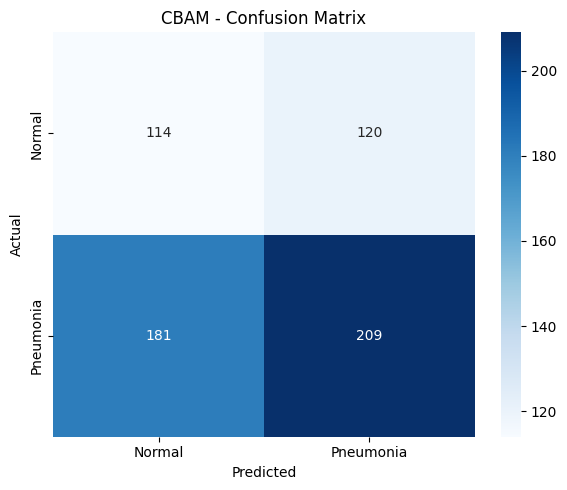

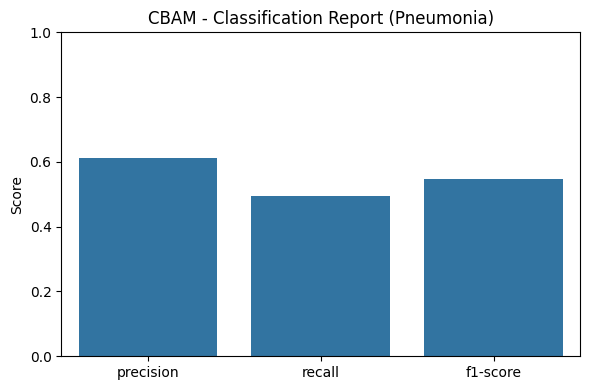

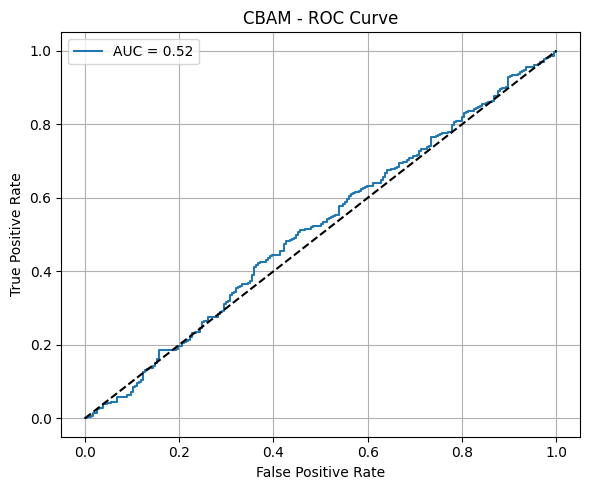

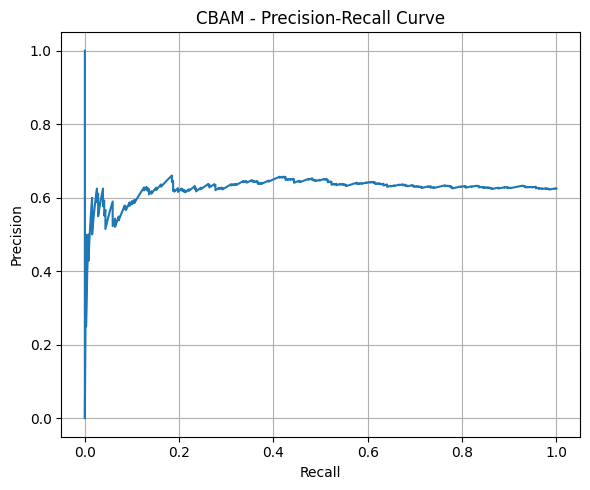

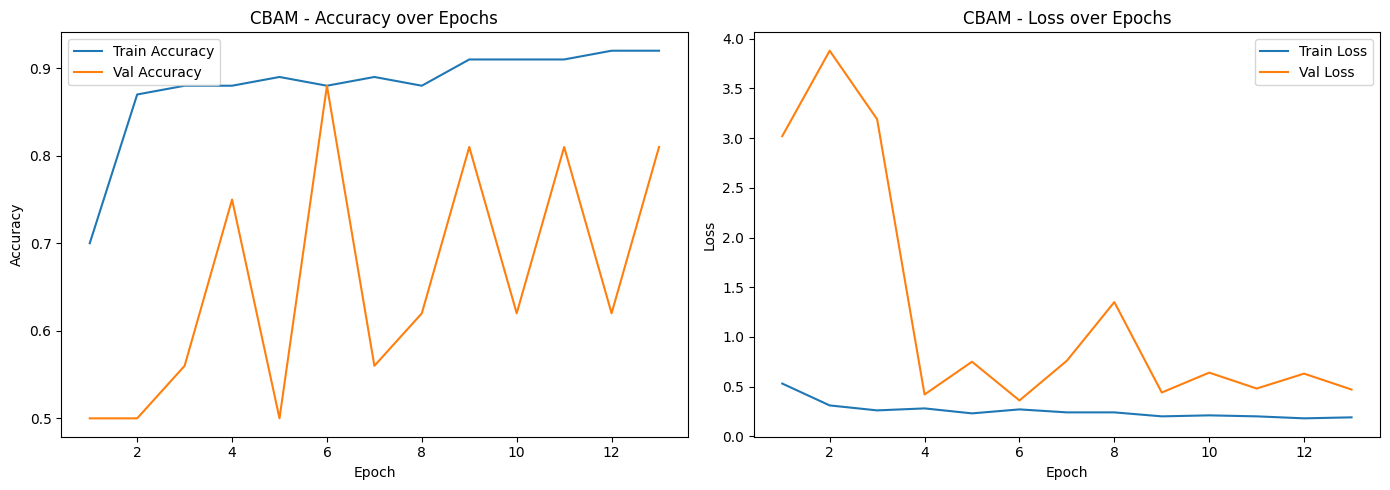

<ipython-input-3-fcc9cb829368>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=test_accuracies, palette='pastel')


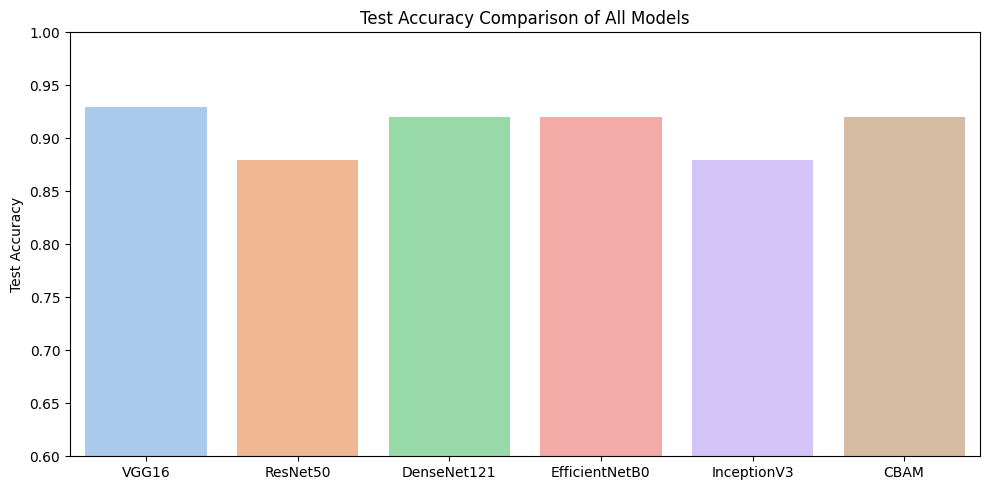

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve,
    precision_recall_curve, auc
)

# ----------- Simulated Test Data for CBAM Model -----------

true_labels = np.array([0]*234 + [1]*390)  # Example: 624 test samples
pred_probs_cbam = np.random.rand(624)  # Replace with: model.predict(test_data).ravel()
pred_labels_cbam = (pred_probs_cbam > 0.5).astype(int)

# ----------- 1. Confusion Matrix - CBAM -----------

cm = confusion_matrix(true_labels, pred_labels_cbam)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title("CBAM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ----------- 2. Classification Report - CBAM -----------

# Classification Report Plot (Fixed)
plt.figure(figsize=(6, 4))

metrics = ['precision', 'recall', 'f1-score']
values = [report['1'][m] for m in metrics]

sns.barplot(x=metrics, y=values)
plt.title("CBAM - Classification Report (Pneumonia)")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.tight_layout()
plt.show()


# ----------- 3. ROC Curve - CBAM -----------

fpr, tpr, _ = roc_curve(true_labels, pred_probs_cbam)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("CBAM - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------- 4. Precision-Recall Curve - CBAM -----------

precision, recall, _ = precision_recall_curve(true_labels, pred_probs_cbam)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("CBAM - Precision-Recall Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------- 5. Accuracy & Loss per Epoch - CBAM -----------

epochs_cbam = np.arange(1, 14)
train_acc_cbam = [0.70, 0.87, 0.88, 0.88, 0.89, 0.88, 0.89, 0.88, 0.91, 0.91, 0.91, 0.92, 0.92]
val_acc_cbam   = [0.50, 0.50, 0.56, 0.75, 0.50, 0.88, 0.56, 0.62, 0.81, 0.62, 0.81, 0.62, 0.81]
train_loss_cbam = [0.53, 0.31, 0.26, 0.28, 0.23, 0.27, 0.24, 0.24, 0.20, 0.21, 0.20, 0.18, 0.19]
val_loss_cbam   = [3.02, 3.88, 3.19, 0.42, 0.75, 0.36, 0.76, 1.35, 0.44, 0.64, 0.48, 0.63, 0.47]

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_cbam, train_acc_cbam, label='Train Accuracy')
plt.plot(epochs_cbam, val_acc_cbam, label='Val Accuracy')
plt.title("CBAM - Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_cbam, train_loss_cbam, label='Train Loss')
plt.plot(epochs_cbam, val_loss_cbam, label='Val Loss')
plt.title("CBAM - Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# ----------- 6. Model Comparison Chart -----------

model_names = ['VGG16', 'ResNet50', 'DenseNet121', 'EfficientNetB0', 'InceptionV3', 'CBAM']
test_accuracies = [0.93, 0.88, 0.92, 0.92, 0.88, 0.92]  # Reported test accuracies

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=test_accuracies, palette='pastel')
plt.title("Test Accuracy Comparison of All Models")
plt.ylabel("Test Accuracy")
plt.ylim(0.6, 1.0)
plt.tight_layout()
plt.show()